<h3>Практическое задание №1. Зона покрытия БС и скорость канала</h3>

<h6>Используя модель распространения в виде 3GPP,
где 𝜁 = 2.1 – константа распространения, y – трехмерное расстояние между БС и АУ,
𝑓𝐶 – частота, высота БС ℎ𝐵 = 10 м, высота АУ ℎ𝑈 = 1.5 м.
Определите максимальный радиус покрытия БС R при 𝑓𝐶 = 28 ГГц, излучаемой
мощности 𝑃𝑇 = 2 Вт, усилении антенн на БС и АУ 𝐺𝐵 = 10, 𝐺𝑈 = 2, спектральной
плотности шума 𝑁0 = −174 дБм/Гц, и полосе пропускания B=400 Мгц. Минимальный
принимаемый сигнал в 5G NR – -9.4 дБм. Интерференция отсутствует</h6>

In [2]:
import math as m;
import numpy as np;
import matplotlib.pyplot as plt;

In [4]:
hB = 10;
hU = 1.5;
fC = 28;
Pt = 10 * m.log(2e3, 10);
GB = 10;
GU = 2;
E = 2.1;
N0 = -174;
B = 400e6;
Pr = -9.4;

def getNoiseByB(B):
    return N0 + 10 * m.log(B, 10); # Найдём шум для нашей полосы пропускания

def getMaxRByB(B):
    Ldb = Pt + GB + GU - Pr - getNoiseByB(B); # Выразим потери через суммы мощностей
    VR = 10 ** ((Ldb - 32.4 - 20 * m.log(fC, 10)) / (10 * E)); # Найдем объёмный радиус
    return m.sqrt(VR ** 2 - (hB - hU) ** 2); # Найдем радиус на плоскости

print('Максимальное расстояние - %f' %(getMaxRByB(B)));

Максимальное расстояние - 7233.670460


<h6>В условиях п.1, используя теорему Шэннона определите скорость на расстояниях R/10,
R/2, и R для полосы B=10 МГц. Объясните разницу.</h6>

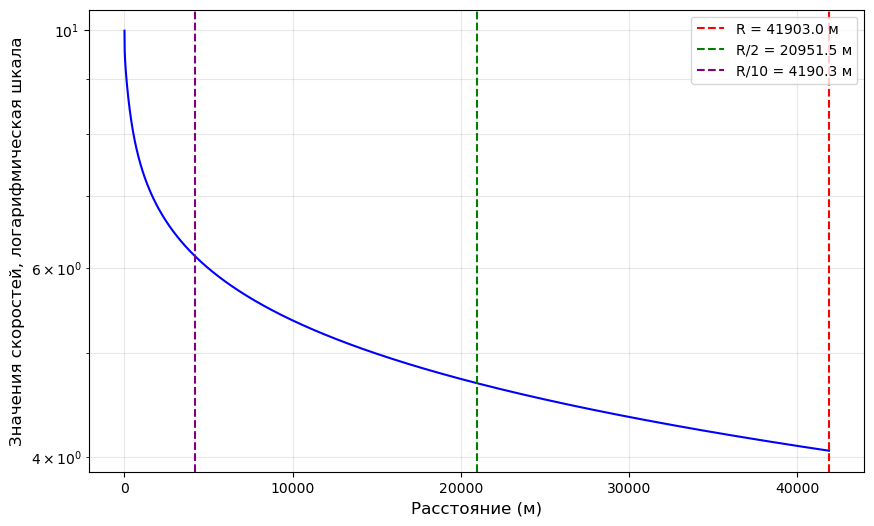

Теоретическая скорость на R = 11249.61 б/c
Теоретическая скорость на R/2 = 48226.58 б/c
Теоретическая скорость на R/10 = 1414520.40 б/c


In [62]:
Bnew = 10e6; # Новая ширина полосы
Nnew = getNoiseByB(Bnew); # Новый шум
RMax = getMaxRByB(Bnew); # Новое максимальное расстояние (в условиях п.1)

Ldb = lambda y: 32.4 + 10 * E * m.log(y, 10) + 20 * m.log(fC); # Анонимка для 3GPP
PByY = lambda y : Pt + GB + GU - Ldb(y); # Мощность на приёмнике на расстоянии y
C = lambda y: B * m.log(1 + 10 ** ((PByY(y) - Nnew) / 10), 2); # Скорость по Шеннону

x_values = np.linspace(0.1, RMax, 10000);
y_values = np.log10([C(xDot) for xDot in x_values]);

plt.figure(figsize=(10, 6));
plt.yscale('log', base = 10);
plt.plot(x_values, y_values, color="blue");

plt.axvline(x=RMax, color="red", linestyle="--", label=f"R = {RMax:.1f} м");
plt.axvline(x=RMax/2, color="green", linestyle="--", label=f"R/2 = {RMax/2:.1f} м");
plt.axvline(x=RMax/10, color="purple", linestyle="--", label=f"R/10 = {RMax/10:.1f} м");

plt.xlabel("Расстояние (м)", fontsize=12);
plt.ylabel("Значения скоростей, логарифмическая шкала", fontsize=12);

plt.legend();
plt.grid(alpha=0.3, which = 'both');
plt.show();

print("Теоретическая скорость на R = %.2f б/c" % C(RMax));
print("Теоретическая скорость на R/2 = %.2f б/c" % C(RMax/2));
print("Теоретическая скорость на R/10 = %.2f б/c" % C(RMax/10));

<h6>В условиях п.1, предположите, что принимаемый сигнал является случайной величиной
со средним рассчитанным в п.1 и дисперсией 3 дБм (теневое замирание). Определите
зону покрытия БС, используя параметры в п.1, так чтобы, АУ на границе соты находился
в состоянии устойчивой связи не менее 95% времени. </h6>

In [64]:
Z = 1.645 # Квантиль для н.р.
Pr = Pr + Z * m.sqrt(3);
print('Максимальное расстояние - %f' %(getMaxRByB(B))); # Максимальное переиспользование кода

Максимальное расстояние - 3872.606296


<h6>Объясните разницу в радиусах покрытия в п.1 и п.2. Какая из моделей является более
реалистичной?</h6>

Сложно сравнивать модели, которые дают немного разные показатели. Если в первом случае мы получаем четкий обрыв по преодолению минимальной мощности, то во втором случае мы получаем распределение скоростей по расстоянию. Вторая модель говорит о том, что скорость может вполне себе существовать на достаточно большом расстоянии от БС, однако скорости, описанные стандартом, остаются в кольце достаточно маленького радиуса, сильно меньшего ограничения из первой модели.